<a href="https://colab.research.google.com/github/google/applied-machine-learning-intensive/blob/master/content/04_classification/01_binary_classification/colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Copyright 2020 Google LLC.

In [194]:
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Binary Classification


In this unit we will explore [binary classification](https://en.wikipedia.org/wiki/Binary_classification) using [logistic regression](https://en.wikipedia.org/wiki/Logistic_regression).
 
Some of these terms might be new, so let's explore them a bit more.
 
[Classification](https://en.wikipedia.org/wiki/Statistical_classification) is the process of mapping a set of data points to a finite set of labels. From our [regression](https://en.wikipedia.org/wiki/Regression_analysis) labs, you likely remember that regression models such as [linear regression](https://en.wikipedia.org/wiki/Linear_regression) map input variables to a range of continuous values. In the domain of machine learning, models that predict continuous values are considered regression models. Models that predict a known finite set of values are considered classification models.
 
*So what does binary mean?*
 
Binary means there are only two values to predict. Binary classification is used to predict one of two values. These can be *true*/*false*, *malignant*/*benign*, *yes*/*no*, or any possible this-or-that options. For simplicity, these options are usually encoded as 1 and 0.
 
*And what about logistic regression?*
 
You've already seen linear regression, which attempts to fit a line to a set of data in order to predict continuous values. [Logistic regression](https://en.wikipedia.org/wiki/Logistic_regression) similarly attempts to fit a line to data. However, the line is typically a [logistic/sigmoid](https://en.wikipedia.org/wiki/Logistic_function) curve. Instead of predicting a continuous value, the model uses the logistic curve to split the data into two classes. One class falls to one side of the line, and the other class falls to the other side of the line.

## Framing the Problem

*Cindy's Produce For Good* has a problem. Its business model revolves around collecting unsold fruit and vegetables from local growers and distributing them to families in need so that they can consume it or resell it at local farmer's markets and roadside stands.
 
Quite a few complaints have come in lately from families and customers who have had a bitter surprise. They've peeled what they thought was an orange only to bite in and find out that they are eating a grapefruit!
 
Cindy's growers give her truckloads of mixed citrus: lemons, limes, oranges, and grapefruit. A volunteer crew sorts the fruit. They are really good at sorting lemons and limes, but they falsely identify grapefruit as oranges about 5% of the time.
 
In order to ensure customers get the oranges they expect, Cindy has created a machine that measures the weight, color, and largest diameter of fruit. She wants to create some software that can use this information and tell her workers if the fruit is an orange or not.
 
She put a few thousand pieces of orange-looking fruit from one of her shipments through the sensors and manually labelled them as oranges or grapefruit. Looking at the data, she couldn't see an obvious pattern. Her best performance was about 90% accuracy. Her human sorters can do at least 95%. She's requested our help to see if we can solve the orange vs. grapefruit problem.
 
In this lab we'll examine Cindy's citrus data and try to build a model to help her reliably sort her fruit as well as or better than human sorters.

### Exercise 1: Thinking About the Data

Before we dive in to looking closely at the data, let's think about the problem space and the dataset. Consider the questions below.

Lemons,Limes,Oranges,Grapefruit,  
Weight,color,diameter

#### Question 1

Is this problem actually a good fit for machine learning? Why or why not?

>The citrus problem is a good fit for machine learning. It's based on classifying fruits based on a set of inputs, which include weight, color, and maximum diameter. The output would label to lemons,limes,oranges, or grapefruit.

#### Question 2

If we do build Cindy a machine learning model, what biases might exist in the data? Is there anything that might cause her model to have trouble generalizing to other data? If so, how might she make the model more resilient?

>There could exist measurement bias due to underlying problems with the accuracy of the data and how is measured or assessed. Precision and accuracy would be sources to consider when trying to collect weight and max diameter data

---

#### Question 3

We've been asked to create a system that determines if a piece of fruit is an orange or not an orange. But aside from that, we haven't gotten much information about how the system would work as a whole.

Describe how you would design the system from end-to-end. Things to consider:

- Would the input fruit be all of the fruit that Cindy receives? Only the fruit suspected of being an orange? Only questionable fruit? Anything suspected of being an orange or a grapefruit?

- What happens to fruit classified as "not orange". Is it automatically considered a grapefruit? Is it thrown away? Put in a mixed fruit bag?

Justify the inputs and the output actions for the system. What are the trade-offs?

>The input for this kind of sytem would ideally be all the fruit that Cindy receives. When creating algorithms for situations like these, it is important to consider a wide range of data. Limiting the data inputs to just a specfic set of fruits will not be as representative compared to a large set of fruits.


---

## Exploratory Data Analysis

### Acquire the Data

We have some idea about the problem that we are trying to solve, so let's take a look at what has been collected. The data is [hosted on Kaggle](https://www.kaggle.com/joshmcadams/oranges-vs-grapefruit). You can download the dataset and then upload it to this lab or use the code blocks below to fetch the data directly.


#### Direct Kaggle Download

Follow the [API Credentials](https://github.com/Kaggle/kaggle-api#api-credentials) instructions and get a `kaggle.json` file (if you don't already have one), and upload it to this lab.

Then run the code block below to download the oranges vs. grapefruit dataset.

In [195]:
! chmod 600 kaggle.json && (ls ~/.kaggle 2>/dev/null || mkdir ~/.kaggle) && mv kaggle.json ~/.kaggle/ && echo 'Done'

chmod: kaggle.json: No such file or directory


In [196]:
!kaggle datasets download joshmcadams/oranges-vs-grapefruit
!ls

oranges-vs-grapefruit.zip: Skipping, found more recently modified local copy (use --force to force download)
AMLI - Classification- Binary.pdf colab.ipynb
README.md                         oranges-vs-grapefruit.zip
citrus.csv


There should now be an `oranges-vs-grapefruit.zip` file in the virtual machine for this lab. Let's unzip it so we can access the data.

In [197]:
!unzip -o oranges-vs-grapefruit.zip
!ls

Archive:  oranges-vs-grapefruit.zip
  inflating: citrus.csv              
AMLI - Classification- Binary.pdf colab.ipynb
README.md                         oranges-vs-grapefruit.zip
citrus.csv


There is now a `citrus.csv` file in our virtual machine. Let's start digging into the data next.

### Basic Analysis


First and foremost, we need to load the data. For that we'll rely on [Pandas](https://pandas.pydata.org/) and use the `read_csv` function since the data was provided to us as a CSV file.
 
After we load the data, let's sample it to get an idea of what we are working with.

In [198]:
import pandas as pd

citrus_df = pd.read_csv('citrus.csv', header=0)
citrus_df.sample(10, random_state=2020)

,name,diameter,weight,red,green,blue
4436,orange,9.98,175.92,159,73,11
3829,orange,9.38,166.49,149,75,2
2434,orange,8.43,152.07,155,79,11
4449,orange,9.99,176.13,161,86,2
43,orange,5.40,108.18,148,81,2
9961,grapefruit,14.37,242.67,156,70,38
4509,orange,10.09,177.14,153,90,3
5114,grapefruit,9.10,158.51,149,82,31
9374,grapefruit,12.90,219.27,151,64,24
3273,orange,8.96,160.25,159,95,12


 It looks like we have a mixed bag of fruit containing oranges and grapefruit, just as expected.

 How many do we have of each?

#### Exercise 2: Basic Statistics

Let's take a moment to determine the distribution of fruit in our dataset. Use [pyplot](https://matplotlib.org/api/pyplot_api.html) to create a histogram of the values in the `name` column of our `DataFrame`.

##### **Student Solution**

In [199]:
import numpy as np
import matplotlib.pyplot as plt

---

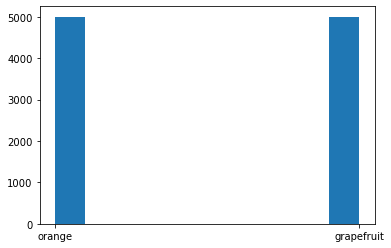

In [200]:
plt.hist(citrus_df['name'])
plt.show()

### Interpreting Our Histogram



The histogram shows the data evenly distributed across different types of fruit. This distribution makes the dataset very balanced for building a model for our classifier.

### Describing Our Dataset

Next let's do a simple `describe` of our dataset to get some more detailed information.

In [201]:
citrus_df.describe()

,diameter,weight,red,green,blue
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,9.975685,175.050792,153.847800,76.010600,11.363200
std,1.947844,29.212119,10.432954,11.708433,9.061275
min,2.960000,86.760000,115.000000,31.000000,2.000000
25%,8.460000,152.220000,147.000000,68.000000,2.000000
50%,9.980000,174.985000,154.000000,76.000000,10.000000
75%,11.480000,197.722500,161.000000,84.000000,17.000000
max,16.450000,261.510000,192.000000,116.000000,56.000000


Since every count is 10,000, we don't seem to have missing values.

Also, every `min` value is a positive number. This is good since it would be really odd to have negative diameters, weights, or colors.

Do the values themselves look reasonable? The diameter is measured in centimeters. Is a 2 cm piece of fruit believable? What about a 16 cm piece of fruit?

Similarly, do the weights seem within ranges that we'd expect?

It is actually difficult to tell since we have different kinds of fruit in this bag. It would be easier to inspect summary statistics for each type of fruit.

#### Exercise 3: More Focused Description

We have used `describe()` to get statistics about the entire dataset, but there isn't a lot of information in the data. Write Python code to print `describe()` statistics for each type of fruit in the dataset. Use the `percentiles` argument to the [describe method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) to not print the 25th and 75th percentile.

Your output should look similar to:

```
orange
          diameter       weight          red        green         blue
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000
mean      8.474424   152.804920   156.832800    81.988200     7.115200
std       1.260665    18.669021     9.890258    10.090789     6.493779
min       2.960000    86.760000   123.000000    49.000000     2.000000
50%       8.470000   152.665000   157.000000    82.000000     4.000000
max      12.870000   231.090000   192.000000   116.000000    38.000000

grapefruit
          diameter       weight          red        green         blue
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000
mean     11.476946   197.296664   150.862800    70.033000    15.611200
std       1.221148    19.193190    10.103148    10.044924     9.271592
min       7.630000   126.790000   115.000000    31.000000     2.000000
50%      11.450000   197.430000   151.000000    70.000000    15.000000
max      16.450000   261.510000   187.000000   103.000000    56.000000
```


##### **Student Solution**

In [202]:

orange_df = citrus_df[citrus_df['name'] == 'orange']
grapefruit_df = citrus_df[citrus_df['name'] =='grapefruit']

print("orange",orange_df.describe(percentiles=[.5]))

print("grapefruit",grapefruit_df.describe(percentiles=[.5]))

orange           diameter       weight          red        green         blue
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000
mean      8.474424   152.804920   156.832800    81.988200     7.115200
std       1.260665    18.669021     9.890258    10.090789     6.493779
min       2.960000    86.760000   123.000000    49.000000     2.000000
50%       8.470000   152.665000   157.000000    82.000000     4.000000
max      12.870000   231.090000   192.000000   116.000000    38.000000
grapefruit           diameter       weight          red        green         blue
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000
mean     11.476946   197.296664   150.862800    70.033000    15.611200
std       1.221148    19.193190    10.103148    10.044924     9.271592
min       7.630000   126.790000   115.000000    31.000000     2.000000
50%      11.450000   197.430000   151.000000    70.000000    15.000000
max      16.450000   261.510000   187.000000   103.000000  

---

### Visualizing With Box Plots

Now that we've sanity checked our data, let's visualize it to see if we can gather more insight. Above we gathered the min, max, mean, etc. for each numeric column for each type of fruit in a tabular form. Let's now visualize that data using a box plot and the [Altair](https://altair-viz.github.io/) visualization library.

To start using Altair, we simply import it.

In [203]:
import altair as alt

Next we will use the `mark_boxplot` method of the [Chart](https://altair-viz.github.io/user_guide/generated/toplevel/altair.Chart.html?highlight=mark_boxplot) class to create our boxplot.

Let's start by plotting the diameter by name.

To do this we must first sample a subset of our data. We have 20,000 rows of data, and Altair cannot visualize that much data in a boxplot. The row limit is 5,000 rows, so we'll create a 5,000 row sample and then pass that sample to Altair.

In [204]:
citrus_df_sample = citrus_df.sample(n=5000, random_state=2020)

alt.Chart(citrus_df_sample, width=400).mark_boxplot().encode(
    x='name',
    y='diameter'
)

alt.Chart(...)

What insights can we glean from this graphic?
 
As expected, the diameter of a grapefruit trends larger than that of an orange, but there is some overlap.
 
Let's now add in weight to our boxplot.

In [205]:
alt.Chart(citrus_df_sample, width=400).mark_boxplot().encode(
    x='name',
    y='diameter'
) | alt.Chart(citrus_df_sample, width=400).mark_boxplot().encode(
    x='name',
    y='weight'
)

alt.HConcatChart(...)

### Correlation

Notice that relative weight and diameter seem pretty similar. These two columns might be closely correlated enough that we only need to use one of them. Let's check the correlation coefficient.

#### Exercise 4: Correlation Coefficient

Based on our visualization above, we suspect that diameter and weight are highly correlated. Write code to find the correlation coefficient between the diameter and weight columns in our `DataFrame`.

*Hint: Check out the [corr](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html) documentation.*

##### **Student Solution**

In [206]:
#new dataframe for diameter and weight
diameter_df = pd.Series(citrus_df['weight'])
weight_df = pd.Series(citrus_df['diameter'])

#combining to single dataframe
df = pd.merge(diameter_df,weight_df,right_index= True, left_index= True)

#getting correlation matrix
matrix = df.corr(method ='pearson')

---

### Understanding the Correlation

The correlation between diameter and weight is over 99%. That is a very high value.

This shouldn't come as a big surprise. We should expect that the weight of a piece of fruit grows as its diameter grows.

For now we can leave the data as is, but remember this correlation. We might be able to use it to remove a column from our training data without negatively affecting our model.

Let's take another look at height and weight. They are definitely correlated, but how do they relate to each other for each fruit type?

One way to see this is to use a scatter plot chart to plot the diameter versus the weight, segmented by fruit type.

We'll use Altair to do this.

In [207]:
alt.Chart(citrus_df_sample).mark_circle().encode(
    x='diameter',
    y='weight',
    color='name'
)

alt.Chart(...)

We can see that oranges and grapefruit have very similar rates of weight gain as their diameter increases. This shouldn't be too surprising since they are very similar fruits.
 
In this chart we can also see that there are some fruits that are clearly oranges because of their small size and weight, as well as some that are clearly grapefruit due to their large size and weight. However, we have a large number of fruits that will be difficult to classify using diameter and weight alone.

### Checking Color Values

We've looked pretty closely at the diameter and weight values, but we haven't done much with the color (RGB) values.

Let's first see if boxplots are helpful.

In [208]:
alt.Chart(citrus_df_sample, width=400).mark_boxplot().encode(
    x='name',
    y='red'
) | alt.Chart(citrus_df_sample, width=400).mark_boxplot().encode(
    x='name',
    y='green'
) | alt.Chart(citrus_df_sample, width=400).mark_boxplot().encode(
    x='name',
    y='blue'
)

alt.HConcatChart(...)

There doesn't seem to be a lot of value there, at least examining each element of color separately. There is quite a bit of overlap between each color element, with grapefruit displaying a little less red and green typically.

It would also be nice to "sanity check" the color values, similar to how we checked to make sure that our diameters and weights were within reason. We could see if the values fall within a reasonable range, but then we'd need to know reasonable RGB values for oranges and grapefruit.

Since we are dealing with color data, we can just create an image for each piece of fruit that contains a sampling (or all) of the colors that we have and we can see if it looks reasonable.

First, let's get an exact count of the number of samples of each fruit type.

In [209]:
citrus_df.groupby('name')['name'].count()

name
grapefruit    5000
orange        5000
Name: name, dtype: int64

As expected, we have 5000 samples each. We can create a 100x50 image for each fruit type and visualize the data.

We'll use [PIL's Image class](https://pillow.readthedocs.io/en/stable/reference/Image.html) to create a white 100x50 image. Then we'll get the editable pixel map from the image and assign the color value for each orange in our data to a different pixel in the image.

Once we have the image filled out with color, we'll use PyPlot to display the image.

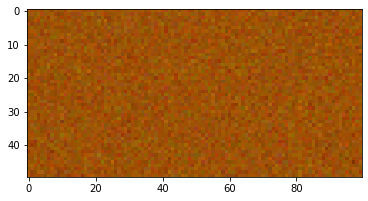

In [210]:
from PIL import Image
from matplotlib.pyplot import imshow
import numpy as np

height, width = 50, 100
img = Image.new('RGB', (width, height), color=(255, 255, 255))
pixels = img.load()

row_i, col_i = 0, 0
for _, fruit in citrus_df[citrus_df['name'] == 'orange'].iterrows():
  pixels[col_i, row_i] = (fruit['red'], fruit['green'], fruit['blue'])
  col_i += 1
  if col_i >= width:
    col_i = 0
    row_i += 1

imshow(img)

That looks like a pretty reasonable orange color. What about the grapefruit?

#### Exercise 5: Create a Color Map Image

We only visualized data from oranges. We'd really like to see the colors of all of the fruit. Create and show a 100x100 image that contains the colors for all of the oranges in the first 100x50 block. This should be followed with the colors for all of the grapefruit in the next 100x50 block. Visually inspect your image to see if the colors are believable as oranges and grapefruit.

##### **Student Solution**

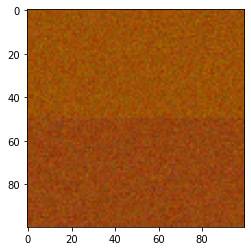

In [211]:
height, width = 100, 100



img = Image.new('RGB', (width, height), color=(255, 255, 255))
pixels = img.load()
row_i, col_i = 0, 0
for _, fruit in citrus_df.iterrows():
  pixels[col_i, row_i] = (fruit['red'], fruit['green'], fruit['blue'])
  col_i += 1
  if col_i >= width:
    col_i = 0
    row_i += 1



imshow(img)

---

### Data Analysis Summary

We've done a lot of data analysis and have a pretty good feel for our data. We have:

* Examined the distribution of our dataset and seen we have an equal distribution of fruit types
* Determined that no data is missing
* Determined that our weight, diameter, and color values are all within reason
* Found a strong correlation between weight and diameter

Let's see if we can build a model to classify our oranges!


## Simple Logistic Model

It is now time to build and iterate on a model. We'll start with a simple logistic regression model using scikit-learn's [sklearn.linear_model.LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) class and the feature columns already in our training data.

Let's first remind ourselves of the columns we have at our disposal.

In [212]:
citrus_df.columns

Index(['name', 'diameter', 'weight', 'red', 'green', 'blue'], dtype='object')

We'll use 'diameter', 'weight', 'red', 'green', and 'blue' as feature columns. Using 'name' for our target column is tempting, but remember that it contains fruit names for values, and for this exercise, we are only interested in determining if a piece of fruit is an orange or not an orange. Let's create a new column called 'is_orange' that contains the value `True` if the datum is an orange and `False` otherwise.

### Exercise 6: Is Orange?

Create a new column in `citrus_df` called `is_orange`. The column should be a boolean column and should contain the value `True` if a given row is labeled as an orange and `False` otherwise.

##### **Student Solution**

In [213]:
new_df = citrus_df['name'] == 'orange'
print(citrus_df)
#citrus_df.columns = ('name','diameter','weight','red','green','blue')
#citrus_df.append(new_df)
#citrus_df.insert(loc=2, column ="is_orange",value =new_df)
#itrus.df
#citrus_df.append(new_df)

            name  diameter  weight  red  green  blue
0         orange      2.96   86.76  172     85     2
1         orange      3.91   88.05  166     78     3
2         orange      4.42   95.17  156     81     2
3         orange      4.47   95.60  163     81     4
4         orange      4.48   95.76  161     72     9
...          ...       ...     ...  ...    ...   ...
9995  grapefruit     15.35  253.89  149     77    20
9996  grapefruit     15.41  254.67  148     68     7
9997  grapefruit     15.59  256.50  168     82    20
9998  grapefruit     15.92  260.14  142     72    11
9999  grapefruit     16.45  261.51  152     74     2

[10000 rows x 6 columns]


---

### Examining Our New Target Column

Now that we've created a new target column, we should do some checking to make sure that it was created correctly.

First we'll simply see the count per value.

In [214]:
citrus_df.groupby('is_orange')['is_orange'].count()

KeyError: 'is_orange'

There should be 5,000 `True` values and 5,000 `False` values.

Now check to see that all 5,000 of the `True` values have the `name` "orange".

In [146]:
citrus_df[citrus_df['is_orange']]['name'].unique()

array(['orange'], dtype=object)

We should only see a single value in the unique list ('orange') since all rows with 'is_orange' set to `True` should have a 'name' of 'orange'.

### Train/Test Split

We can now split our data for training and testing. First we will create variables to hold our training and target column names.

In [148]:
target_column = 'is_orange'

feature_columns = ['diameter', 'weight', 'red', 'green', 'blue']

target_column, feature_columns

('is_orange', ['diameter', 'weight', 'red', 'green', 'blue'])

We need to split the data into a training and testing set. In this case we'll split 20% of the data off for testing and train on the other 80%. We can use scikit-learn's `train_test_split` function to do this. It is also a really good idea to shuffle our data, and `train_test_split` allows us to do this too.

After we make the split, we can see how many data points we will train off of for each class.

In [149]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    citrus_df[feature_columns],
    citrus_df[target_column],
    test_size=0.2,
    random_state=180,
    shuffle=True)

y_train.groupby(y_train).count()

is_orange
False    4030
True     3970
Name: is_orange, dtype: int64

Hmm. It looks like our training set has become a little uneven. Ideally, we would maintain the same ratio of oranges to non-oranges in our training and testing groups as the ratio in the whole set (50/50). But after splitting the data, we've ended up with a training set that skews towards non-oranges, and a test set that skews the opposite way, towards oranges.

In [150]:
y_test.groupby(y_test).count()

is_orange
False     970
True     1030
Name: is_orange, dtype: int64

Luckily, there's a solution for this problem: [stratified sampling](https://en.wikipedia.org/wiki/Stratified_sampling). Stratifying our data ensures that the ratio of distinct values in the given column remains the same in our training and test sets as it is in the whole set (half orange and half non-orange, in this case).

#### Exercise 7: Stratified Train Test Split

Look at the [documentation for `train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) and find the argument that can be used to stratify the data. Rewrite the split above to create a stratified split. When you are done, there should be 4,000 `True` values and 4,000 `False` values in the training data and 1,000 of each in the testing data. Print the counts to verify.

##### **Student Solution**

In [158]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    citrus_df[feature_columns],
    citrus_df[target_column],
    test_size=0.2,
    random_state=180,
    shuffle=True,
    stratify = citrus_df[target_column])

y_train.groupby(y_train).count()

is_orange
False    4000
True     4000
Name: is_orange, dtype: int64

---

### Examining The Split Data

We can now verify that we have 80% of the data in training...

In [159]:
X_train.shape, y_train.shape

((8000, 5), (8000,))

And 20% in testing.

In [0]:
X_test.shape, y_test.shape

Let's look at the training data and see if it stratified correctly.

In [160]:
y_train.describe()

count     8000
unique       2
top       True
freq      4000
Name: is_orange, dtype: object

From this output we can see that there are 8,000 pieces of data with 2 unique values. The top value is `True`, and it occurs 4,000 times. That would leave us with 4,000 other values that are `False`.

We can do the same for the `y_test` data.

In [161]:
y_test.describe()

count     2000
unique       2
top       True
freq      1000
Name: is_orange, dtype: object

Another alternative is to use `groupby` on the series. Notice that the `by` argument contains the series once again and not a column name.

In [162]:
y_test.groupby(by=y_test).count()

is_orange
False    1000
True     1000
Name: is_orange, dtype: int64

### Create and Train the Model

It is finally time to build and train our model. As a reminder, we are using [sklearn.linear_model.LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

First, we'll build a baseline model with default arguments, and see how well it does. To build the model we import `LogisticRegression`, create a class instance, and then fit the model.

In [215]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=2020)
model.fit(X_train, y_train)

LogisticRegression(random_state=2020)

### Measure Model Performance


We now have a model ready to use to make predictions. Let's first make predictions on the test data that we held out of our training set and see how well we did.

The first step is to actually make the predictions.

In [0]:
predictions = model.predict(X_test)

Now we can use metrics functions from scikit-learn to see how well our model performed. We'll check the accuracy, precision, recall, and F1 scores.

In [231]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuracy: ', round(accuracy_score(predictions, y_test), 3))
print('Precision: ', round(precision_score(predictions, y_test), 3))
print('Recall: ', round(recall_score(predictions, y_test), 3))
print('F1: ', round(f1_score(predictions, y_test), 3))

Accuracy:  0.497
Precision:  0.48
Recall:  0.497
F1:  0.488


Numbers for most of the metrics are above 90%, which is better than Cindy was sorting!

Let's see how this looks in a confusion matrix.

In [0]:
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()

print(f'True Positive: {tp}\nTrue Negative: {tn}\nFalse Positive: {fp}\nFalse Negative: {fn}')

We have just under 100 falsely identified fruit. There are about twice as many false negatives as there are false positives. Let's take a few minutes to think about what this confusion matrix means.

#### Exercise 8: Interpreting a Confusion Matrix

In the text cell below, explain what a false positive and false negative represent in our dataset: which is an orange classified as a grapefruit and which is a grapefruit classified as an orange?

##### **Student Solution**

>False positive would mean the model identified an orange when it was actually grapefruit and a false negative would be the opposite

---

#### ROC Curve

We can visualize this in another way using the [Receiver-Operator Curve](https://en.wikipedia.org/wiki/Receiver_operating_characteristic). This graph plots the true positive rate on the y-axis against the false positive rate on the x-axis.

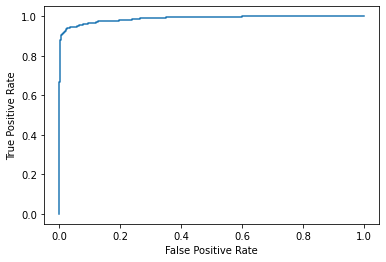

In [216]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

scores = model.decision_function(X_test)

fpr, tpr, _ = roc_curve(y_test, scores, pos_label=True)

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.plot(fpr, tpr)
plt.show()

We can see that there is a steep increase in false positives as the true positive rate crosses into the 90% range.

#### Precision Recall Curve

We can also get a feel for how precision and recall relate for this model by plotting the [precision recall curve](https://en.wikipedia.org/wiki/Precision_and_recall).

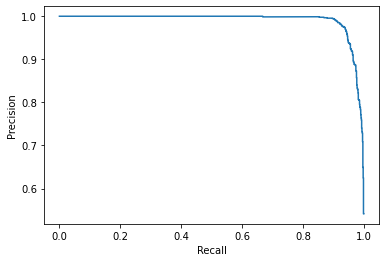

In [217]:
from sklearn.metrics import precision_recall_curve

scores = model.decision_function(X_test)

precision, recall, _ = precision_recall_curve(y_test, scores)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.plot(recall, precision)
plt.show()

This shows the balance between precision and recall as the model adjusts classification thresholds.

## Improving Our Model

Our initial model was actually pretty good. But can it be even better?
 
In the next exercise we'll attempt to improve our model by exploring hyperparameters and manipulating features.

### Exercise 9: Using GridSearchCV

We will now experiment with different hyperparameters to see if we can tune the model to increase our scores. To do this we will use the [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) class to [tune hyperparameters](https://scikit-learn.org/stable/modules/grid_search.html) of the scikit-learn [LogisticRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

GridSearchCV is a class used to test different hyperparameters for a model. The search accepts a dictionary containing keys that map to model parameters. The values are lists for hyperparameters that you want to experiment with or single values for parameters that you want to keep constant.

#### Question 1: Performing the Search
 
Below is some code that imports the necessary functions and classes and sets up a logistic regression model for grid search. Add code to the grid search to test different hyperparameters such as `tol`, `C`, `solver`, and `max_iter`.
 
The best estimator will be displayed after running the code block.

##### **Student Solution**

In [227]:
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, GridSearchCV

citrus_df = pd.read_csv('citrus.csv', header=0)
citrus_df['is_orange'] = citrus_df['name'].apply(lambda name: name == 'orange')

target_column = 'is_orange'
feature_columns = ['diameter', 'weight', 'red', 'green', 'blue']

X_train, X_validate, y_train, y_validate = train_test_split(
    citrus_df[feature_columns],
    citrus_df[target_column],
    test_size=0.2,
    random_state=42,
    shuffle=True,
    stratify=citrus_df[target_column])

model = LogisticRegression(
    random_state=2020,
)

param_grid = {'tol': [0.1, 1, 10, 100],  
              'C': [1, 0.1, 0.01, 0.001, 0.0001], 
              'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
              'max_iter': [100]}


search = GridSearchCV(model,param_grid)


search.fit(X_train, y_train)

model = search.best_estimator_

model.fit(X_train,y_train)
predictions = model.predict(X_validate)
print(search.best_estimator_)

LogisticRegression(C=1, random_state=2020, solver='newton-cg', tol=0.1)


---

#### Question 2: Validate the Model

Now that we have found a model that scored the highest in a cross-validation grid search, let's validate the model to see if it generalizes well on our validation data.

We held out validation data in the `X_validate` and `y_validate` variables. Use that data to calculate the accuracy, precision, recall, and F1 scores for the model.

##### **Student Solution**

In [224]:
print(X_validate)

      diameter  weight  red  green  blue
7919     11.72  201.62  138     73    17
911       7.34  135.89  166     69     2
6631     10.92  188.84  152     77    18
4536     10.13  177.58  138     97     7
8486     12.11  207.28  157     74     9
...        ...     ...  ...    ...   ...
598       6.99  131.25  152    100    12
8354     12.03  206.00  145     63     5
4744     10.55  183.04  150     71     7
4566     10.18  178.43  159     73    19
2313      8.37  150.94  154     76     6

[2000 rows x 5 columns]


In [230]:
print('Accuracy: ', round(accuracy_score(predictions, y_validate), 3))
print('Precision: ', round(precision_score(predictions, y_validate), 3))
print('Recall: ', round(recall_score(predictions, y_validate), 3))
print('F1: ', round(f1_score(predictions, y_validate), 3))

Accuracy:  0.957
Precision:  0.94
Recall:  0.973
F1:  0.956


---

#### Question 3: Relative Model Quality

Now that we have the scores for our model on our validation set, is the version found by grid search notably better? Discuss the difference in scores, if any, between our base model and the model selected by grid search.

Before


Accuracy:  0.497.

Precision:  0.48. 

Recall:  0.497. 

F1:  0.488. 

>All validation parameters improved with grid search. Everything was numerically close to 1.

---

## Exercise 10: Final Model Assessment

Given our model performance, is this machine learning model a good fit for the problem?

##### **Student Solution**

>The machine learning algorithm developed was not a good fit for the original problem. The model only took into account whether or not a specfic citrus fruit was an orange or not. The original dataset only took into account the oranges and the grapefruit.

---

## Challenge

### Question 1

Normalization and standardization of data is not strictly required for performing logistic regression. It is, however, suggested in some cases. Research reasons why you might want (or not want) to normalize or standardize your input data to a logistic regression.

Explain your findings and link to any relevant articles.

#### **Student Solution**

>It depends on the dataset entirely. Differnt methods work for the kinds of varibales and features that are being measured and tested.

---

### Question 2

Use the [sklearn.preprocessing.StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) to scale the feature data before training a logistic model on our oranges dataset. Use [sklearn.model_selection.GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) to iterate through hyperparameters to find an optimal model.

In [232]:
from sklearn.preprocessing import StandardScaler

In [244]:





#Standard Scalar
citrus_df[feature_columns] = StandardScaler().fit_transform(citrus_df[feature_columns])



X_train, X_validate, y_train, y_validate = train_test_split(
    citrus_df[feature_columns],
    citrus_df[target_column],
    test_size=0.2,
    random_state=42,
    shuffle=True,
    stratify=citrus_df[target_column])

model = LogisticRegression(
    random_state=2020,
)

param_grid = {'tol': [0.1, 1, 10, 100],  
              'C': [1, 0.1, 0.01, 0.001, 0.0001], 
              'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
              'max_iter': [100]}


search = GridSearchCV(model,param_grid)


search.fit(X_train, y_train)

model = search.best_estimator_

model.fit(X_train,y_train)
predictions = model.predict(X_validate)
print(search.best_estimator_)


#scalar.fit(citrus_df)
#scalar


LogisticRegression(C=1, random_state=2020, solver='newton-cg', tol=0.1)


In [246]:
print('Accuracy: ', round(accuracy_score(predictions, y_validate), 3))
print('Precision: ', round(precision_score(predictions, y_validate), 3))
print('Recall: ', round(recall_score(predictions, y_validate), 3))
print('F1: ', round(f1_score(predictions, y_validate), 3))

Accuracy:  0.942
Precision:  0.935
Recall:  0.948
F1:  0.942


---

### Question 3

Are the optimal hyperparameters the same for the logistic regression model before and after scaling the data? Why or why not? Did you notice any other differences?

#### **Student Solution**

> Though the the optimal hyperparameters were the same, The representative Accuracy, Precision, Recall, and F1 parameters all decreased. It all has to do with the magnitude and spread of the data. Using the standard scalar involves looking at the spread of the data, where the magnitude is not important. The lower validation meaasures means that the magnitude was important and that the present raw data turned out to be important in developing the algorithm.

---